In [ ]:
# paper: [accuracy: 59.21%]
# dataset: www.robots.ox.ac.uk/~vgg/data/pets/
# 37 categories: 12 cats and 25 dogs breeds

In [ ]:
#  autoreload: reloads modules automatically before entering the execution of code
# %autoreload 2: reload all modules (except those excluded by %aimport) every time before executing the python code typed
# %matplotlib inline: plot outputs and matplotlib graphs will be included in notebook

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# fastai v1 library on Pytorch1.0: github.com/fastai/fastai/

In [5]:
from fastai.vision import *
from fastai.metrics import error_rate

In [6]:
# batch_size: if get out of memory, use smaller batch size

In [7]:
bs = 64 # 16

In [8]:
# untar_data: pass an URL and downland and extract the data
# URLs.PETS: https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet
# ;path: display datapath

In [18]:
help(untar_data)
path = untar_data(URLs.PETS);path

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



PosixPath('/Users/liaoke/.fastai/data/oxford-iiit-pet')

In [21]:
path.ls()

[PosixPath('/Users/liaoke/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/Users/liaoke/.fastai/data/oxford-iiit-pet/annotations')]

In [ ]:
path_anno = path/'annotations'
path_img = path/'images'

In [ ]:
# get labels from filenames
# ImageDataBunch.from_name_re: get labels from filenames using a regular expression

In [22]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/Users/liaoke/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 PosixPath('/Users/liaoke/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),
 PosixPath('/Users/liaoke/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),
 PosixPath('/Users/liaoke/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),
 PosixPath('/Users/liaoke/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg')]

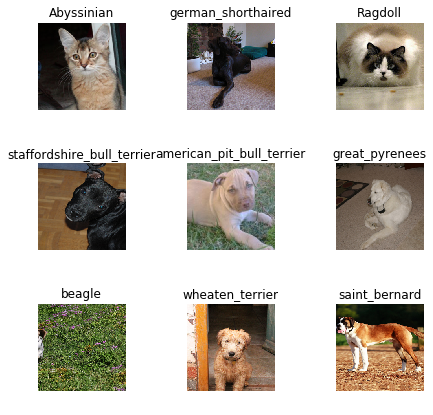

In [25]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [ ]:
# data.c: give the number of classes

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

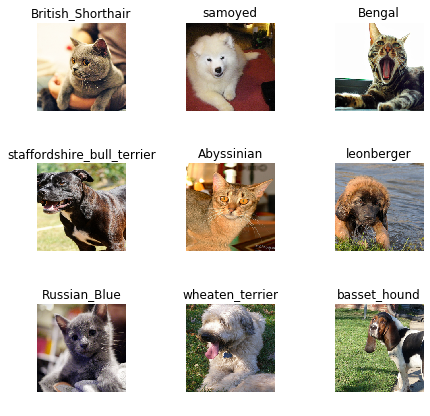

In [28]:
data.show_batch(rows=3, figsize=(6,6))
print(data.classes)
len(data.classes), data.c

In [ ]:
# train model using CNN backbone and FC head with a single hidden layer as a classifier: transfer learning
# input: images; output: predicted probability for each categories (37 outputs)
# model backbone: ResNet34
# cnn_learner: get the pre-trained model with a custom head which is suitable for own data

In [29]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/liaoke/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [02:40<00:00, 545093.78it/s] 


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
# train the model
# epoch: cycles of all data

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
# save the model

In [ ]:
learn.save('stage-1')

In [ ]:
# result analysis

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(losses)